# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [47]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [48]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [75,200,183]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,20398,1137,3,4407,3,975
1,3067,13240,23127,3941,9959,731
2,36847,43950,20170,36534,239,47943


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
#### Index-0: 
This customer with purchase amount for Fresh product above third quartile and minimum for 'Grocery' and  'Detergents_Paper', indicates of a retailer for fresh products.

#### Index-1: 
This customer seems to be a cafe/Restaurent establishment because of purchase amount above third quartile for 'Milk' and  'Grocery' product categories.  It also has reasonable amount of purchases for  'Detergents_Paper' and 'Frozen' categories that have use in cafes.

#### Index-2: 
This customer with very high amount of purchases for all categories well above third quartile except 'Detergents_Paper' category seems to be major food retailer store.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
target = data['Grocery']

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)

# TODO: Report the score of the prediction using the testing set
score = cross_val_score(regressor, new_data, target, cv=10)
print score

[ 0.58126489  0.81632789  0.63723583  0.79590856  0.84294557  0.36380179
  0.71464275  0.71307216  0.6293979   0.21408632]


In [50]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
target = data['Grocery']

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test) 
print score
zip(new_data, regressor.feature_importances_)

0.681884008544


[('Fresh', 0.01693978681756796),
 ('Milk', 0.045990961705693917),
 ('Frozen', 0.020789561851090717),
 ('Detergents_Paper', 0.89107688739646251),
 ('Delicatessen', 0.025202802229184865)]

In [51]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
target = data['Grocery']

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=32).fit(X_train, y_train)
y_pred = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, y_pred) 
print score
zip(new_data, regressor.feature_importances_)

0.710609428618


[('Fresh', 0.018490799278789254),
 ('Milk', 0.04449898669810979),
 ('Frozen', 0.019879653417509871),
 ('Detergents_Paper', 0.89142712938563018),
 ('Delicatessen', 0.025703431219960948)]

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict 'Grocery' feature. The reported prediction score was 0.71( that was much higher than 'R^2' scores that I calculated for other featurs. The other features were either low or negative. So they are all necessary for prediction. Still the score for 'Grocery' feature is not very close to 1 in order to say that this feature is not necessary for identifying customers' spending habits. But it might worth it to remove it from feature list as the other features can somehow model it and make the final model simpler.

If we have a high r^2 score(high correlation with other features), this would not be good for identifying customers' spending habits(since the customer would purchase other products along with the one we are predicting, as we could actually derive this feature from the rest of the features). Therefore a negative / low r^2 value would represent the opposite as we could identify the customer's specific behavior just from the one feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


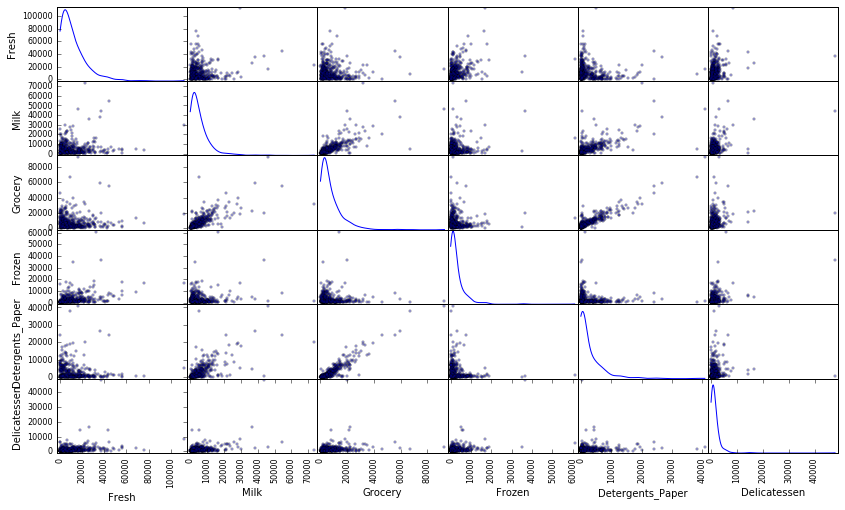

In [52]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()

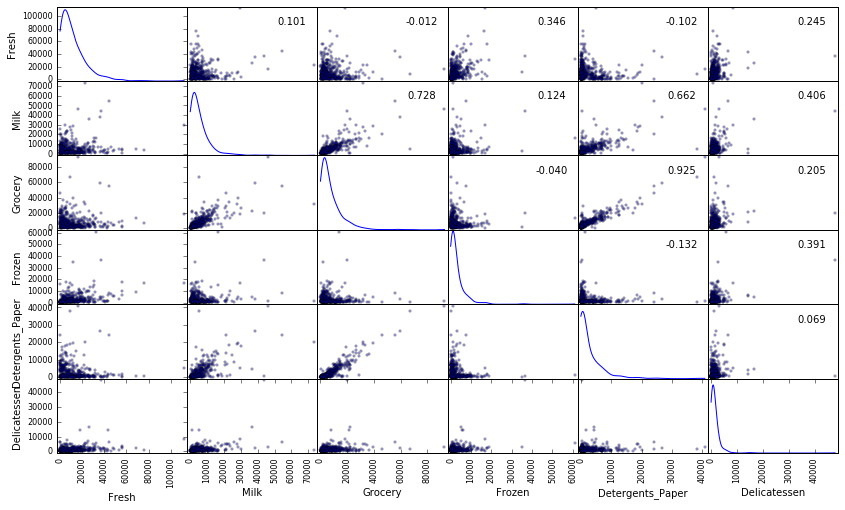

In [53]:
# Produce a scatter matrix for each pair of features in the data

axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There are a couple of features that exhibit some degree of correlation with 'Grocery' feature like 'Detergents_Paper'(0.92) and 'Milk' (0.73) features. This confirms my suspicions about the relevance of the feature I attempted to predict. So dropping Grocery from the list will help the dimensionality of the feature space.



The data for all features including the correlated ones are right-skewed distributed. The mass of the distribution is concentrated on the left of the figure. Positive/right nonparametric skew means the mean is greater than (to the right of) the median. Significant deviation from zero skewness indicates that we must apply some kind of normalisation to make the features normally distributed.we can actually get an idea of this from the basic stats of the dataset, since the mean is above the median for all features. We typically see this type of distribution when working with sales or income data.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

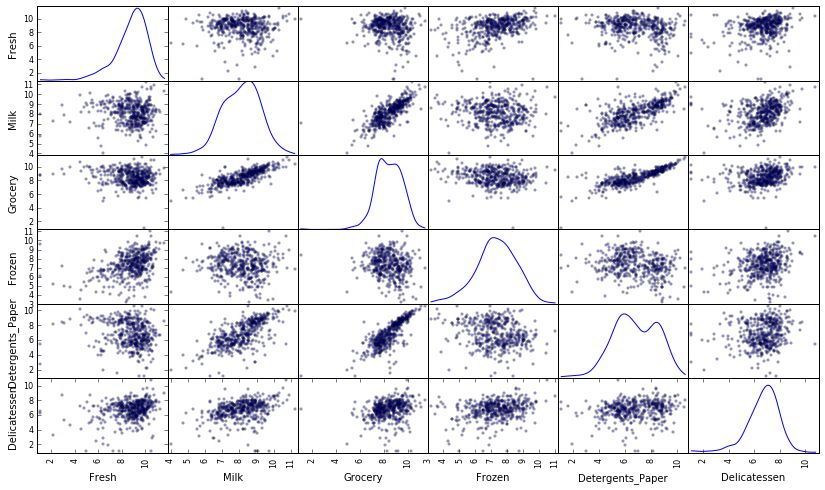

In [54]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [55]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [56]:
from collections import Counter
outliers_index = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_temp = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_temp)
    outliers_index.extend(list(outliers_temp.index.values))
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [item for item, count in Counter(outliers_index).iteritems() if count >1]
print "outliers =" ,outliers


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print pd.DataFrame(data.loc[outliers], columns = data.keys()).reset_index(drop = True)
print "Wholesale customers dataset has {} samples with {} features each.".format(*good_data.shape)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


outliers = [128, 154, 65, 66, 75]
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    140   8847     3823     142              1062             3
1    622     55      137      75                 7             8
2     85  20959    45828      36             24231          1423
3      9   1534     7417     175              3468            27
4  20398   1137        3    4407                 3           975
Wholesale customers dataset has 435 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are some data points that can be considered outliers for more than one feature based on the above definitions.
It would be better to remove the outliers that are common for more than one feature because it might be because of data entry or input bias that will affect the learning process. Outliers would also impact the PCA and clustering processes that we might need for classification on finding optimal number of clusters.

I found 5 double-counted outliers and removed them from the original dataset. The new Wholesale customers’ dataset, good_data, has 435 samples with 6 features each.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [57]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
pca_samples = pca.transform(log_samples)
print pca_samples
print log_samples

[[ 8.30262011 -0.47471576  0.97741939 -1.11945132 -0.29773904 -4.35143327]
 [-2.99033876 -0.36445596  0.25212352  1.56527677  0.1922364   0.12443078]
 [-0.42320529 -5.28420499  2.73958352 -0.23642208  2.13307985  0.24516565]]
       Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
0   9.923192   7.036148   1.098612   8.390949          1.098612      6.882437
1   8.028455   9.490998  10.048756   8.279190          9.206232      6.594413
2  10.514529  10.690808   9.911952  10.505999          5.476464     10.777768


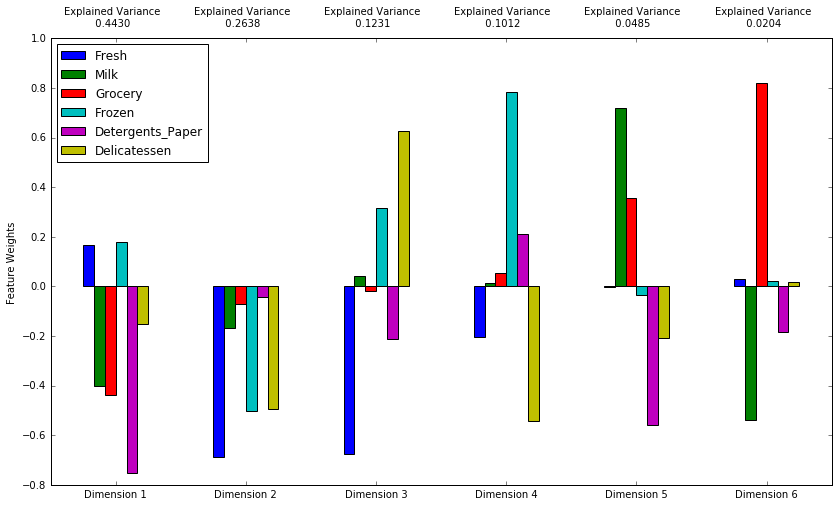

In [58]:

from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [59]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The total explained variance for the first and second principal components is 0.7121. The total explained variance in data by first four principal components is 0.9311. 

• With two dimension we can easily visualize the data(as we do later)

• With four components we retain much more information(great for new features)


• In terms of customers spending, since PCA deals with the variance of the data and the correlation between features, the first component would represent that we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data.

#### First Principal Component Analysis - Dimension 1 

The first principal component is strongly correlated with three of the original variables. The first principal component has strong positive increase with decrease of the negative-weighted Detergents_Paper (-0.75), Grocery (-0.45), and Milk (-0.4) features. This suggests that these three criteria vary together. If one decreases, then the remaining ones tend to as well. This component can be considered as a classification for household products that are purchased together. The customer also might be a hotel due to the highest correlation of this component with Detergents_Paper.

#### Second Principal Component Analysis - Dimension 2

The second principal component has strong positive increase with decrease of the negative-weighted features like Fresh (-0.70), Frozen (-0.50), and Delicatessen (-0.50). The strong correlation between this component and features especially ‘Fresh’ suggests that the customer can be categorized as retail store that sells mostly Fresh, Frozen, and delicatessen products to its local customers.  

#### Third Principal Component Analysis - Dimension 3

The third principal component has strong positive increase with decrease of the negative-weighted Fresh feature and increase of the positive-weighted Delicatessen and Frozen. The Fresh feature has strongest correlation with third component in negative direction, lower than -0.6. The Delicatessen has stronger correlation with this component, about 0.6, than Frozen feature, about 0.4 in positive direction. This may suggest the customer classification of a retail establishment for food services like Restaurants for fresh food and Deli shops for Delicatessen and Frozen products.

#### Forth Principal Component Analysis - Dimension 4

The forth principal component has a very strong positive increase with increase of the positive-weighted Frozen feature, about 0.8, and decrease of the negative-weighted Delicatessen feature, around0.5. The opposite direction of the features with strong correlation together and to the forth component suggests that even if the customer in this category may be a small or local retailer that provides either frozen products or delicatessen products not both of them. 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [60]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,8.3026,-0.4747,0.9774,-1.1195,-0.2977,-4.3514
1,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
2,-0.4232,-5.2842,2.7396,-0.2364,2.1331,0.2452


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [61]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [62]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,8.3026,-0.4747
1,-2.9903,-0.3645
2,-0.4232,-5.2842


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

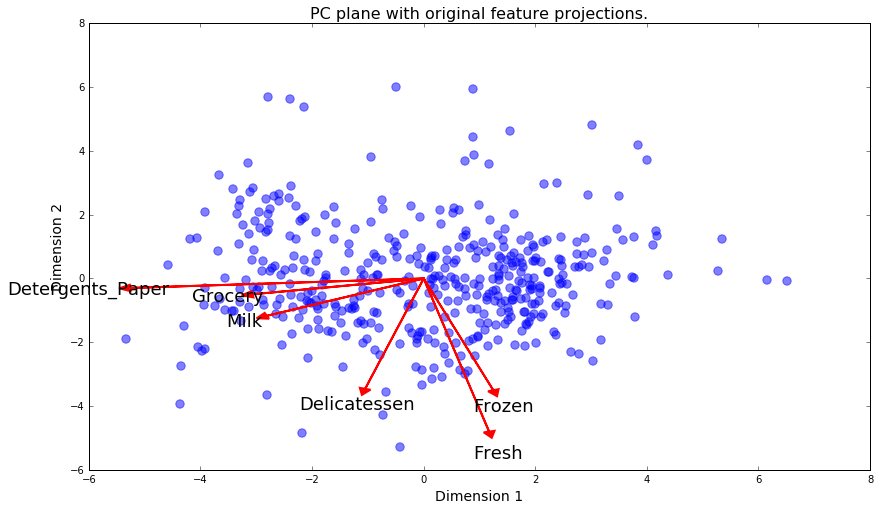

In [63]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Answer:
'Detergents_Paper' products are most strongly correlate with first component, because in that dimention we see the maximum variance among te points. Similarly for the second component 'Fresh' products show highest viariance. This exactly agrees with pca_results plot we obtained earlier.  

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

k-means clustering, and its associated expectation-maximization algorithm, is a special case of a Gaussian mixture model, specifically, the limit of taking all covariance as diagonal, equal, and small. It is often easy to generalize a k-means problem into a Gaussian mixture model. In addition to simplicity it is fast and able to generate tighter clusters.

The Gaussian Mixture Model has high flexibility and is able to model any complicated data distribution especially by selecting large K (the number of Gaussian components) and small variances. But the disadvantage of the GMM model is that the number of required parameters will be increases as the number of mixture increases. It is also vulnerable to overfitting problem. 

Key Points:

Speed/Scalability:

    K-Means faster and more scalable
    GMM slower due to using information about the data distribution — e.g., probabilities of points belonging to clusters.

Cluster assignment:

    K-Means hard assignment of points to cluster (assumes symmetrical spherical shapes)
    GMM soft assignment gives more information such as probabilities (assumes elliptical shape)




Because of the advantages of K-means over Gaussian Mixture Model especially its simplicity, I will use it for this analysis.


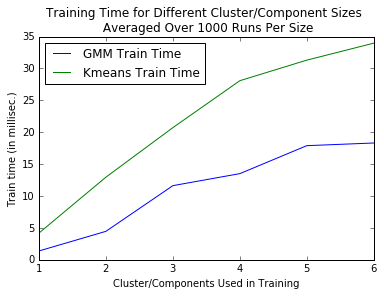

In [65]:
import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n = 1000
k = 6

kmeans_train_times = []
for k in xrange(1, 7):
    cum_time = 0.
    for i in xrange(n):
        start = time.time()
        KMeans(n_clusters=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    kmeans_train_times.append([k, train_time])

km_df = pd.DataFrame(kmeans_train_times, columns=['KM_Clusters', 'KM_Time'])

gmm_train_times = []
for k in xrange(1, 7):
    cum_time = 0.
    for i in xrange(n):
        start = time.time()
        GaussianMixture(n_components=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    gmm_train_times.append([k, train_time])

gmm_df = pd.DataFrame(gmm_train_times, columns=['GMM_Components', 'GMM_Time'])
times_df = km_df.join(gmm_df)

plt.plot(times_df.GMM_Components, times_df.GMM_Time * 1000., label='GMM Train Time')
plt.plot(times_df.GMM_Components, times_df.KM_Time * 1000., label='Kmeans Train Time')
plt.legend(loc='best')
plt.ylabel('Train time (in millisec.)')
plt.xlabel('Cluster/Components Used in Training')
plt.title('Training Time for Different Cluster/Component Sizes \n Averaged Over {} Runs Per Size'.format(n))
plt.show()


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
# TODO: Apply your clustering algorithm of choice to the reduced data 

for i in range (2,7):
    
    clusterer = KMeans(n_clusters=i, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data) 

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

    score = metrics.silhouette_score(reduced_data, preds, metric='euclidean')

    print  "\n centers: \n" ,centers, "\n sample_preds:\n ",sample_preds, "\n pca_samples :\n ",pca_samples
    print  "\n N_clusters = ", i, "\n Score = ",score


 centers: 
[[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]] 
 sample_preds:
  [0 1 0] 
 pca_samples :
  [[ 8.30262011 -0.47471576]
 [-2.99033876 -0.36445596]
 [-0.42320529 -5.28420499]]

 N_clusters =  2 
 Score =  0.426281015469

 centers: 
[[-1.90807636  2.0962454 ]
 [ 1.74395866  0.04085513]
 [-1.59016368 -1.23678893]] 
 sample_preds:
  [1 2 2] 
 pca_samples :
  [[ 8.30262011 -0.47471576]
 [-2.99033876 -0.36445596]
 [-0.42320529 -5.28420499]]

 N_clusters =  3 
 Score =  0.39689092645

 centers: 
[[ 0.82134842 -1.09640841]
 [-2.20886092 -0.80557387]
 [ 2.20878075  0.84464249]
 [-2.08549179  2.24218483]] 
 sample_preds:
  [2 1 0] 
 pca_samples :
  [[ 8.30262011 -0.47471576]
 [-2.99033876 -0.36445596]
 [-0.42320529 -5.28420499]]

 N_clusters =  4 
 Score =  0.332009582682

 centers: 
[[-2.55451657  2.41003117]
 [ 2.64218703  0.52461516]
 [ 0.34084753  0.85722602]
 [ 0.95448386 -1.62649872]
 [-2.30665683 -0.85231133]] 
 sample_preds:
  [1 4 3] 
 pca_samples :
  [[ 8.30262011 -0.

In [74]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data) 

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

score = metrics.silhouette_score(reduced_data, preds, metric='euclidean')

print  "\n centers: \n" ,centers, "\n sample_preds:\n ",sample_preds, "\n pca_samples :\n ",pca_samples
print  "\n N_clusters = ", i, "\n Score = ",score


 centers: 
[[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]] 
 sample_preds:
  [0 1 0] 
 pca_samples :
  [[ 8.30262011 -0.47471576]
 [-2.99033876 -0.36445596]
 [-0.42320529 -5.28420499]]

 N_clusters =  6 
 Score =  0.426281015469


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette scores for several cluster numbers I tried are as follows:
 
 
*Cluster     | *Score|
* |2	     | 0.4294|
* |3	     | 0.4013|
* |4	     | 0.3336|
* |5	     | 0.3551|
 
Of these, the number of clusters equal to 2 has the best silhouette score of 0.4294

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

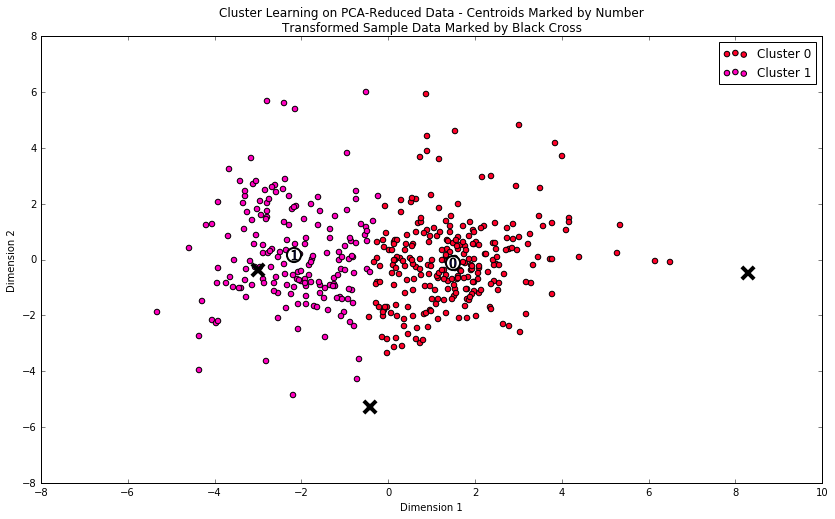

In [75]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [77]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers) 

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


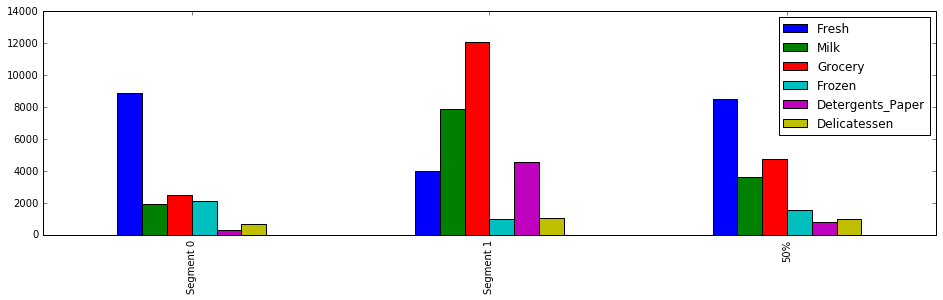

In [78]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

In [22]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [75,200,183]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,20398,1137,3,4407,3,975
1,3067,13240,23127,3941,9959,731
2,36847,43950,20170,36534,239,47943


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**


Cluster 0 identifies with the customer Segment 0 that representsets the retailers establishments like Grocery stors or supermarkets that deleiver products than serving them to their customers. This customer category spends very close amount to the 50% quartile on Fresh (8504), Frozen(1526), and Delicatessen (956) products that we obtained for the original dataset at the begining of this analysis.

Cluster 1 identifies with the customer Segment 1 that representsets the establishments like restaurants or cafes with restrooms because of the significant purchase of Detergents_Paper, Grocery, and Milk that are close to the 75% quartile values of these products accordin to the same data description.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [79]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               11531.0
Milk                 -760.0
Grocery             -2474.0
Frozen               2319.0
Detergents_Paper     -291.0
Delicatessen          294.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh                -938.0
Milk                 5340.0
Grocery             11023.0
Frozen               2989.0
Detergents_Paper     5398.0
Delicatessen         -305.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               27980.0
Milk                42053.0
Grocery             17693.0
Frozen              34446.0
Detergents_Paper      -55.0
Delicatessen        47262.0
dtype: float64


**Answer:**

* Sample point 0 is best represented by customer segment 0 because of significant high amount of spending in Fresh products and very little in Grocery and Detergents_Paper products. So it was correctly predicted to be in Cluster 0.

* Sample point 1 is best represented by customer segment 1 because of significant amount of spending in Milk, Grocery, and Detergents_Paper products that are identical for segment 1 and cluster 1 classification. So it was correctly predicted to be in Cluster 1.

* Sample point 2 is best represented by customer segment 0 because of significant amount of spending in all products except for Detergents_Paper products that is the most weighted feature in segment 1. So the prediction was right for this customer as it should be considered in cluster 0.




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The idea is to use the customer segments for the wholesale distributor to determine which customers would react positively to the change in delivery services. The null hypothesis is that the change has no affect on customers in each segment. To reject the null hypothesis we need to show that there is significant difference on customer purchases due to the changes.
In order to run the A/B test on the delivery service change, I would run the test several times on different percentages of the customers (5%, 10%, and 25%) on a random selection of the customers (for each segments) for two variants, A and B. The test should be run for a specific time interval (at least one month) and in different time of the year. Since the selection of the customers are totally random and within all customers in each segment, then the experiment group (A) will be highly similar to control group (B). 
Then we will study the customer’s purchases differences for each feature in each segment. 
Other measurement of the changes would be to calculate the central point (segments) for each subset of the data and see if there are significant differences between central points or not.

The result of this A/B test will tell us if delivery service change had significant difference or not. If so which segment had positive affect and on which product. The results would help the wholesale distributor to only make the delivery service change to that particular customer segment and for the specific product that had highest positive reaction for that customer group.




### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**


We can perform feature engineering and use the output of an unsupervised learning analysis as an input to a new supervised learning analysis clustered data by using their spendings values on different products as ***Features*** and their ***Customer Segment*** as labels or the ***target variable***.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

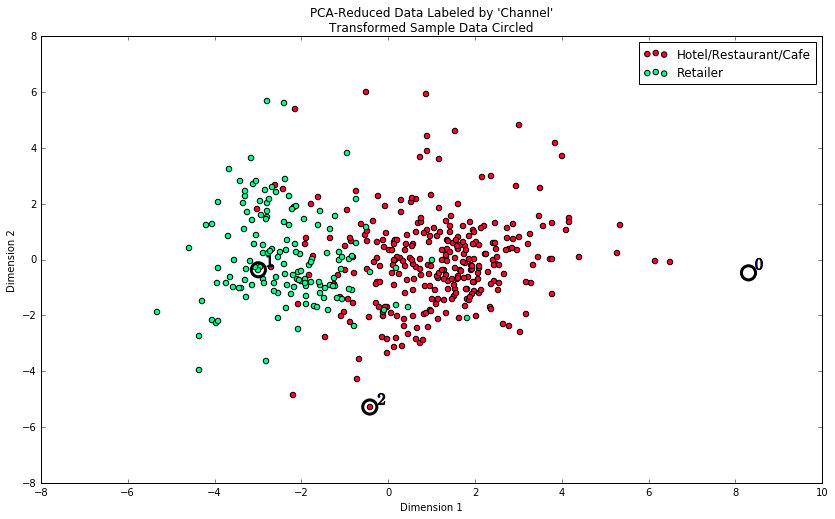

In [25]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and number of chosen clusters, 2, works well compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. Most of the customers would be clasified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution that are as far away from the segment borders as possible. For example the samples 0 and 1 are clasifed properly as pure 'Hotels/Restaurants/Cafes' and 'Retailers' respectively. But the sample 2 is in the border and might be considered for wrong cluster.
So I would consider these classifications as likely consistent with my previous definition of the customer segments.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.